
# INDIVIDUAL ASSIGNMENT 2 -- Admission Data


Our group's data is about the admission data of the University of Edinburgh. After observation about the data, I will manipulate our data set with the following steps:
    1. Give general information about our data. (Before Cleaning)
    2. Analisis the data and do some assertion about the data, Clean the data.
    3. Do some specific statistic operation to show some key pieces of information.
    4. Choose 1 to 5 aspect to do some simple visualization.
    5. Summary and Plans for Assignment 3.

## General Information About The Data

#### NOTICE: IF YOU WANT TO RUN THIS NOTEBOOK, BE CARE FOR ABOUT THE POSITION OF THE DATA FILE AND CONNECTED TO THE INTERNET

In [1]:
import pandas as pd
import numpy as np
import os
import math
df = pd.read_excel('./data/ds4d.xlsx')
# Define a function to two decimal precision
def fix2(x):
    """Format float numbers to two decimal precision, return a float number"""
    return float(format(x, '.2f'))
# Get the file size
file_size = os.path.getsize('./data/ds4d.xlsx')/1024/1024
print('File Size: {} MB'.format(fix2(file_size)))
print('Dataset Contains: {} rows, {} columns'.format(df.shape[0], df.shape[1]))
print('Columns: {}'.format(df.columns.tolist()))

File Size: 1.37 MB
Dataset Contains: 16428 rows, 22 columns
Columns: ['Entry Year', 'Month Code', 'Programme Name and Code', 'Programme Code', 'Programme Description', 'Programme Group', 'Subject Area', 'College', 'School', 'PGT or PGR', 'FT or PT', 'ODL', 'Region', 'Country', 'Fee Status Group', 'Age Class', 'Gender', 'Apps', 'Offers', 'Accepts', 'UF', 'Entrants']


Explaination about some specific columns:
    1. Month Code: The month application submited.
    2. Programme Name and Code, Programme Code, Programme Description, Programme Group: Programme Information
    3. PGT or PGR: Taught Postgraduate or Research Postgraduate
    4. FT or PT: Full-time or Part-time
    5. ODL: Open and Distance Learning
    6. Apps, Offers, Accepts, UF, Entrants

## Export the Overview Information for Observation

In [2]:
# Export the data to a markdown file
with open('./DataOverview.txt', mode="w") as f:
    for i in df.columns:
        print('***{}***\n\n> Number of Categories: {}'.format(i, len(df[i].unique()) ), file=f)
        for a in df[i].unique():
            print('+ {}'.format(a), file=f)
        print('\n', file=f)

## Cleaning the Data
After observation about the data, we found that:
    1. Column ** Region ** contains value equals to 'Unknown', decided to remove it.
    2. Column **Country** contains value equals to 'Unknown', decided to remove it.
    3. Column **Gender** has some empty value, and contains value equals to 'N', stands for 'Not Given', decided to remove these rows, because the amount is very small compared to the entire data.
    4. Column **Age Class** have a strange value '01 Under 25', decided replace to 'Under 25'.

In [3]:
# These code for cleaning data is from our group, we share the same cleaning data to avoid repeated work.
print('Before clean the data: {}'.format(df.shape))
df = df.loc[df['Region'] != 'Unknown']
print('After clean the Region column: {}'.format(df.shape))
df = df.loc[df['Country'] != 'Unknown']
print('After clean the Country column: {}'.format(df.shape))
df = df.loc[df['Gender'] != 'N']
print('After clean the Gender column: {}'.format(df.shape))
# drop all the nan value
df = df.dropna()
print('After drop the null value: {}'.format(df.shape))
df = df.replace('01 Under 25', 'Under 25')

Before clean the data: (16428, 22)
After clean the Region column: (16424, 22)
After clean the Country column: (16424, 22)
After clean the Gender column: (16375, 22)
After drop the null value: (16374, 22)


Do some assertion to check whether data is clean enough.

In [4]:
for i, d in df.iterrows():
    assert d["Region"] != "Unknown", "The 'Unknown' value at Region column should be removed."
    assert d["Country"] != "Unknown", "The 'Unknown' value at Country column should be removed."
    assert d["Gender"] != "N", "The 'N' value at Region column should be removed."
    assert d["Gender"] in ['F', 'M'], 'The Gender must be F or M'
    assert d["Age Class"] != '01 Under 25', "The '01 Under 25' value of Age Class should change to 'Under 25'."
# Check whether contains null value
for k, v in df.iteritems():
    for cell in df[k].isna():
        assert cell != True, "The null value should be removed."

## General Information

1. Get the Total Apps, Offers, Accepts, UF, Entrants for each year.

In [5]:
# Define a function to print series in format
def print_series_with_title(title, ser):
    """This is a format print function for series, title means the first print line, ser means the series for print"""
    print(title)
    for k, i in ser.iteritems():
        print('{} : {}'.format(k, i))
# Total amout of Applications for each year
apps_total = df.groupby('Entry Year')['Apps'].sum()
print_series_with_title("Total amout of Applications for each year:", apps_total)

# Total amout of Offers for each year
offers_total = df.groupby('Entry Year')['Offers'].sum()
print_series_with_title("Total amout of Offers for each year:", offers_total)

# Total amout of Accepts for each year
accepts_total = df.groupby('Entry Year')['Accepts'].sum()
print_series_with_title("Total amout of Accepts for each year:", accepts_total)

# Total amout of UF for each year
uf_total = df.groupby('Entry Year')['UF'].sum()
print_series_with_title("Total amout of UF for each year:", uf_total)

# Total amout of Entrants for each year
entrants_total = df.groupby('Entry Year')['Entrants'].sum()
print_series_with_title("Total amout of Entrants for each year:", entrants_total)

Total amout of Applications for each year:
2015/6 : 2772
2016/7 : 3916
2017/8 : 6079
2018/9 : 4438
Total amout of Offers for each year:
2015/6 : 1778
2016/7 : 2281
2017/8 : 3305
2018/9 : 2650
Total amout of Accepts for each year:
2015/6 : 1464
2016/7 : 1783
2017/8 : 2647
2018/9 : 2174
Total amout of UF for each year:
2015/6 : 1237
2016/7 : 1441
2017/8 : 1789
2018/9 : 1763
Total amout of Entrants for each year:
2015/6 : 979
2016/7 : 1205
2017/8 : 1436
2018/9 : 1463


2. Get the Rate for Offers/Apps, Accepts/Offers, UF/Accepts, Entrants/UF, Entrants/Apps for each year.

In [6]:
# Offers/Apps rate for each year
offer_app_rate = offers_total/apps_total
print_series_with_title("Offers/Apps rate for each year:", offer_app_rate.apply(fix2))

# Accepts/Offers rate for each year
accept_offer_rate = accepts_total/offers_total
print_series_with_title("Accepts/Offers rate for each year:", accept_offer_rate.apply(fix2))

# UF/Accepts rate for each year
uf_accept_rate = uf_total/accepts_total
print_series_with_title("UF/Accepts rate for each year:", uf_accept_rate.apply(fix2))

# Entrants/UF rate for each year
entrant_uf_rate = entrants_total/uf_total
print_series_with_title("Entrants/UF rate for each year:", entrant_uf_rate.apply(fix2))

# Entrants/Apps rate for each year
entrant_app_rate = entrants_total/apps_total
print_series_with_title("Entrants/Apps rate for each year:", entrant_app_rate.apply(fix2))

Offers/Apps rate for each year:
2015/6 : 0.64
2016/7 : 0.58
2017/8 : 0.54
2018/9 : 0.6
Accepts/Offers rate for each year:
2015/6 : 0.82
2016/7 : 0.78
2017/8 : 0.8
2018/9 : 0.82
UF/Accepts rate for each year:
2015/6 : 0.84
2016/7 : 0.81
2017/8 : 0.68
2018/9 : 0.81
Entrants/UF rate for each year:
2015/6 : 0.79
2016/7 : 0.84
2017/8 : 0.8
2018/9 : 0.83
Entrants/Apps rate for each year:
2015/6 : 0.35
2016/7 : 0.31
2017/8 : 0.24
2018/9 : 0.33


3. Get the total amout of programme for each year.

In [7]:
# Total amount of Programmes for each year
programme_year = df.groupby('Entry Year')['Programme Code'].unique()
print_series_with_title("Total amount of Programmes for each year:", programme_year.apply(len))

Total amount of Programmes for each year:
2015/6 : 182
2016/7 : 192
2017/8 : 211
2018/9 : 236


4. Get the total Apps for each year according to Region.

In [8]:
# Total amount of Apps for each year and Region
apps_total_year_region = df.groupby(['Entry Year', 'Region']).sum()['Apps']
print_series_with_title("Total amount of Apps for each year and Region:", apps_total_year_region)

Total amount of Apps for each year and Region:
('2015/6', 'Africa') : 725
('2015/6', 'East Asia') : 63
('2015/6', 'Europe (Scotland)') : 195
('2015/6', 'Europe (non UK)') : 277
('2015/6', 'Europe (rest of UK)') : 550
('2015/6', 'Latin America and the Caribbean') : 88
('2015/6', 'Middle East') : 164
('2015/6', 'North America') : 268
('2015/6', 'South and Central Asia') : 182
('2015/6', 'Southeast Asia & Australia') : 260
('2016/7', 'Africa') : 1341
('2016/7', 'East Asia') : 68
('2016/7', 'Europe (Scotland)') : 248
('2016/7', 'Europe (non UK)') : 346
('2016/7', 'Europe (rest of UK)') : 690
('2016/7', 'Latin America and the Caribbean') : 93
('2016/7', 'Middle East') : 181
('2016/7', 'North America') : 358
('2016/7', 'South and Central Asia') : 299
('2016/7', 'Southeast Asia & Australia') : 292
('2017/8', 'Africa') : 2798
('2017/8', 'East Asia') : 106
('2017/8', 'Europe (Scotland)') : 249
('2017/8', 'Europe (non UK)') : 432
('2017/8', 'Europe (rest of UK)') : 805
('2017/8', 'Latin America 

5. Get the total Entrants/Apps rate for each year according to Region Distribution.

In [9]:
# Entrants/Apps rate for each year and Region
apps_total_year_region = df.groupby(['Entry Year', 'Region']).sum()['Apps']
entrants_total_year_region = df.groupby(['Entry Year', 'Region']).sum()['Entrants']
entrants_apps_rate_year_region = entrants_total_year_region/apps_total_year_region
print_series_with_title("Entrants/Apps rate for each year and Region:", entrants_apps_rate_year_region.apply(fix2))

Entrants/Apps rate for each year and Region:
('2015/6', 'Africa') : 0.13
('2015/6', 'East Asia') : 0.38
('2015/6', 'Europe (Scotland)') : 0.48
('2015/6', 'Europe (non UK)') : 0.44
('2015/6', 'Europe (rest of UK)') : 0.5
('2015/6', 'Latin America and the Caribbean') : 0.42
('2015/6', 'Middle East') : 0.27
('2015/6', 'North America') : 0.4
('2015/6', 'South and Central Asia') : 0.2
('2015/6', 'Southeast Asia & Australia') : 0.55
('2016/7', 'Africa') : 0.07
('2016/7', 'East Asia') : 0.5
('2016/7', 'Europe (Scotland)') : 0.59
('2016/7', 'Europe (non UK)') : 0.5
('2016/7', 'Europe (rest of UK)') : 0.48
('2016/7', 'Latin America and the Caribbean') : 0.39
('2016/7', 'Middle East') : 0.3
('2016/7', 'North America') : 0.4
('2016/7', 'South and Central Asia') : 0.14
('2016/7', 'Southeast Asia & Australia') : 0.5
('2017/8', 'Africa') : 0.05
('2017/8', 'East Asia') : 0.45
('2017/8', 'Europe (Scotland)') : 0.55
('2017/8', 'Europe (non UK)') : 0.48
('2017/8', 'Europe (rest of UK)') : 0.51
('2017/8'

6. Get the gender distribution for each year according to Region Distribution.

In [10]:
apps_total_year_region_gender = df.groupby(['Entry Year', 'Region', 'Gender']).sum()['Apps']
print_series_with_title("Total amout of Apps divide by gender for each year and Region:", apps_total_year_region_gender)

Total amout of Apps divide by gender for each year and Region:
('2015/6', 'Africa', 'F') : 217
('2015/6', 'Africa', 'M') : 508
('2015/6', 'East Asia', 'F') : 24
('2015/6', 'East Asia', 'M') : 39
('2015/6', 'Europe (Scotland)', 'F') : 121
('2015/6', 'Europe (Scotland)', 'M') : 74
('2015/6', 'Europe (non UK)', 'F') : 152
('2015/6', 'Europe (non UK)', 'M') : 125
('2015/6', 'Europe (rest of UK)', 'F') : 301
('2015/6', 'Europe (rest of UK)', 'M') : 249
('2015/6', 'Latin America and the Caribbean', 'F') : 44
('2015/6', 'Latin America and the Caribbean', 'M') : 44
('2015/6', 'Middle East', 'F') : 63
('2015/6', 'Middle East', 'M') : 101
('2015/6', 'North America', 'F') : 168
('2015/6', 'North America', 'M') : 100
('2015/6', 'South and Central Asia', 'F') : 59
('2015/6', 'South and Central Asia', 'M') : 123
('2015/6', 'Southeast Asia & Australia', 'F') : 121
('2015/6', 'Southeast Asia & Australia', 'M') : 139
('2016/7', 'Africa', 'F') : 380
('2016/7', 'Africa', 'M') : 961
('2016/7', 'East Asia'

7. Get an overview information about amount of open programme, school, subject for apply for each year.

In [11]:
schools_year_list = df.groupby(['Entry Year'])['School'].unique()
print_series_with_title("The school open for apply for each year:", schools_year_list)
programme_group_year_list = df.groupby(['Entry Year'])['Programme Group'].unique().apply(len)
print_series_with_title("The amount of programme group open for apply for each year:", programme_group_year_list)
programme_code_year_list = df.groupby(['Entry Year'])['Programme Code'].unique().apply(len)
print_series_with_title("The amount of programme open for apply for each year:", programme_code_year_list)

The school open for apply for each year:
2015/6 : ['Law' 'Chemistry' 'Dick Vet' 'Biology' 'Medical Sch' 'Biomed Sci'
 'Clinical Sci' 'Molecular Sci' 'SCE' 'ECA' 'HCA' 'PPLS' 'LLC' 'Health'
 'SPS' 'Education' 'Geosciences']
2016/7 : ['Law' 'Chemistry' 'Dick Vet' 'Biology' 'Pop Health Sci' 'Medical Sch'
 'Biomed Sci' 'Clinical Sci' 'Molecular Sci' 'SCE' 'ECA' 'HCA' 'PPLS'
 'LLC' 'Health' 'SPS' 'Education' 'Geosciences']
2017/8 : ['Law' 'Chemistry' 'Dick Vet' 'Biology' 'Medical Sch' 'Biomed Sci'
 'Clinical Sci' 'Molecular Sci' 'SCE' 'Business' 'ECA' 'HCA' 'PPLS' 'LLC'
 'Health' 'SPS' 'Education' 'Geosciences']
2018/9 : ['Law' 'Dick Vet' 'Biology' 'Medical Sch' 'Biomed Sci' 'Clinical Sci'
 'Molecular Sci' 'SCE' 'Business' 'ECA' 'HCA' 'PPLS' 'LLC' 'Health' 'SPS'
 'Education' 'Geosciences']
The amount of programme group open for apply for each year:
2015/6 : 64
2016/7 : 67
2017/8 : 70
2018/9 : 76
The amount of programme open for apply for each year:
2015/6 : 182
2016/7 : 192
2017/8 : 211
201

Get the amount of the programme open for apply according to school each year

In [12]:
df.groupby(['Entry Year', 'School'])['Programme Code'].unique().apply(len).to_frame().reset_index().rename(columns = {"Programme Code": "Programme Amount"})

Entry Year         School  Programme Amount
0      2015/6        Biology                 6
1      2015/6     Biomed Sci                21
2      2015/6      Chemistry                 3
3      2015/6   Clinical Sci                34
4      2015/6       Dick Vet                17
..        ...            ...               ...
65     2018/9    Medical Sch                 6
66     2018/9  Molecular Sci                19
67     2018/9           PPLS                10
68     2018/9            SCE                 5
69     2018/9            SPS                12

[70 rows x 3 columns]

Get the amount of the programme open for apply according to subject area each year

In [13]:
df.groupby(['Entry Year', 'Subject Area'])['Programme Code'].unique().apply(len).to_frame().reset_index().rename(columns = {"Programme Code": "Programme Amount"})

Entry Year                                Subject Area  Programme Amount
0       2015/6                                Biochemistry                 2
1       2015/6                         Biomedical Sciences                 2
2       2015/6                               Biotechnology                 4
3       2015/6                                      Celtic                 2
4       2015/6                                   Chemistry                 3
..         ...                                         ...               ...
97      2018/9           Science Comm. & Public Engagement                 3
98      2018/9                     Science and Engineering                 5
99      2018/9  Science, Technology and Innovation Studies                 1
100     2018/9                         Social Anthropology                 1
101     2018/9                         Veterinary Medicine                53

[102 rows x 3 columns]

8. Get the amount of the apps for each year by Age Class

In [14]:
apps_total_year_age = df.groupby(['Entry Year', 'Age Class']).sum()['Apps']
print_series_with_title("Total amount of Apps for each year and Age class:", apps_total_year_age)

Total amount of Apps for each year and Age class:
('2015/6', '25-34') : 1201
('2015/6', '35-44') : 851
('2015/6', '45-54') : 311
('2015/6', '55+') : 122
('2015/6', 'Under 25') : 287
('2016/7', '25-34') : 1838
('2016/7', '35-44') : 1133
('2016/7', '45-54') : 401
('2016/7', '55+') : 135
('2016/7', 'Under 25') : 409
('2017/8', '25-34') : 2954
('2017/8', '35-44') : 1840
('2017/8', '45-54') : 592
('2017/8', '55+') : 174
('2017/8', 'Under 25') : 519
('2018/9', '25-34') : 2142
('2018/9', '35-44') : 1231
('2018/9', '45-54') : 463
('2018/9', '55+') : 153
('2018/9', 'Under 25') : 449


8. Get the amount of the apps for each year by Fee Status Group

In [15]:
apps_total_year_fee = df.groupby(['Entry Year', 'Fee Status Group']).sum()['Apps']
print_series_with_title("Total amount of Apps for each year and Fee Status:", apps_total_year_fee)

Total amount of Apps for each year and Fee Status:
('2015/6', 'HEU') : 18
('2015/6', 'OVS') : 2754
('2016/7', 'HEU') : 16
('2016/7', 'OVS') : 3900
('2017/8', 'HEU') : 22
('2017/8', 'OVS') : 6057
('2018/9', 'HEU') : 25
('2018/9', 'OVS') : 4413


## Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

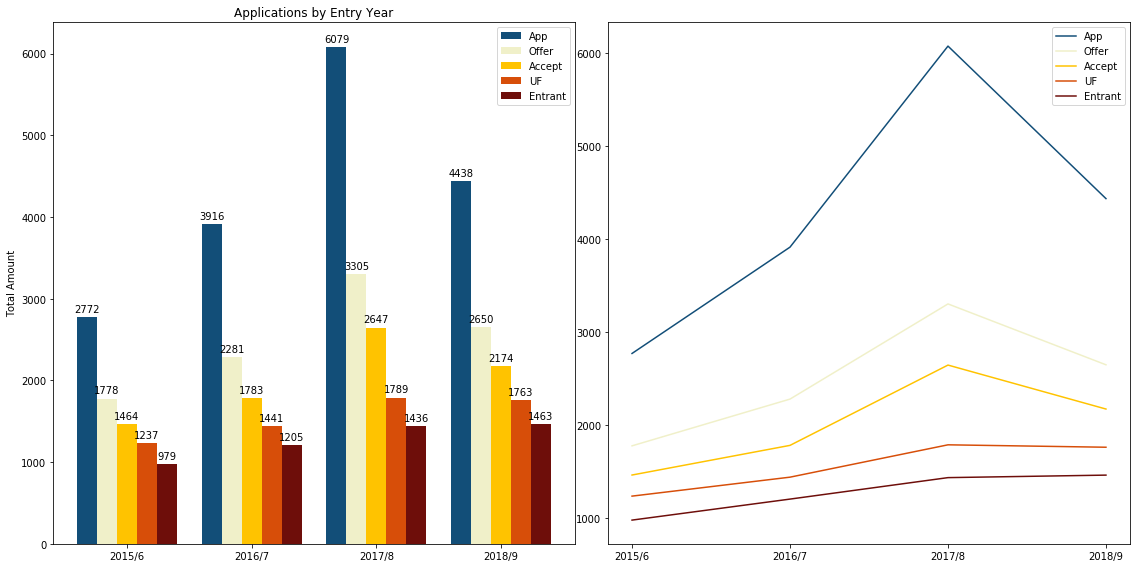

In [17]:
year_labels = apps_total.index.tolist()
x = np.arange(len(year_labels))
width = 0.16  # the width of the bars

fig, ax = plt.subplots(1,2,figsize=(16, 8))

# Make the rects for each year and step
app_rects = ax[0].bar(x - width*2, apps_total, width, color="#124E78", label='App')
offer_rects = ax[0].bar(x - width, offers_total, width, color="#F0F0C9", label='Offer')
accept_rects = ax[0].bar(x, accepts_total, width, color="#FFC300", label='Accept')
uf_rects = ax[0].bar(x + width, uf_total, width, color="#D74E09", label='UF')
entrant_rects = ax[0].bar(x + width*2, entrants_total, width, color="#6E0E0A", label='Entrant')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Total Amount')
ax[0].set_title('Applications by Entry Year')
ax[0].set_xticks(x)
ax[0].set_xticklabels(year_labels)
ax[0].legend()

# Define a function to do change the position of the label
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[0].annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(app_rects)
autolabel(offer_rects)
autolabel(accept_rects)
autolabel(uf_rects)
autolabel(entrant_rects)

fig.tight_layout()

ax[1].plot(year_labels, apps_total, color="#124E78", label='App')
ax[1].plot(year_labels, offers_total, color="#F0F0C9", label='Offer')
ax[1].plot(year_labels, accepts_total, color="#FFC300", label='Accept')
ax[1].plot(year_labels, uf_total, color="#D74E09", label='UF')
ax[1].plot(year_labels, entrants_total, color="#6E0E0A", label='Entrant')
ax[1].legend()
plt.show()


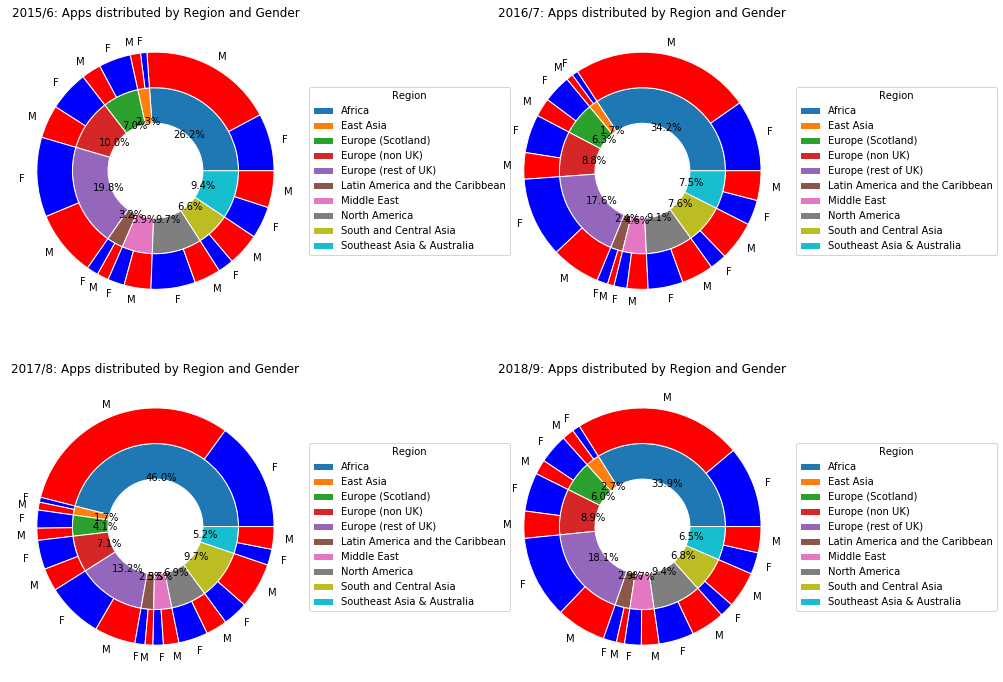

In [18]:
f, ax = plt.subplots(2, 2, figsize=(16, 12))
year_region_group = df.groupby(['Entry Year', 'Region', 'Gender'])
region_label = year_region_group.sum().index.levels[1].tolist()
gender_label = ['F', 'M']

# Make an empty dict to store all the data
total_data = {}
# Loop for append the data
for i in range(0, len(year_labels)):
    years_data = []
    for j in range(0, len(region_label)):
        gender_data = []
        for k in range(0, len(gender_label)):
            cur = (year_labels[i],region_label[j], gender_label[k])
            gender_data.append(year_region_group.get_group(cur).sum()['Apps'])
        years_data.append(gender_data)
    total_data[year_labels[i]] = years_data

# Make a function to generate pie plot for each year's data
def generate_pie(data, ax):
    size = 0.3
    vals = np.array(data)
    outer_color = ['blue', 'red']

    wedges, _, _ = ax.pie(vals.sum(axis=1), radius=1-size, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')
    ax.legend(wedges, region_label,
          title="Region",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    ax.pie(vals.flatten(), radius=1, colors=outer_color,labels=np.array(gender_label*10).flatten(),
           wedgeprops=dict(width=size, edgecolor='w'))
    
ax_arr = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
for i in range(0, len(total_data)):
    generate_pie(total_data[year_labels[i]], ax_arr[i])
    ax_arr[i].set_title('{}: Apps distributed by Region and Gender'.format(year_labels[i]))
plt.show()

#### NOTICE: The lantitude and longtitude value was from a API, the request might be failed for some incorect value, it store in a CSV file, and need to be mapping to correct value manually.

In [19]:
import requests
import folium
# Total apps divide by year and country
apps_total_year_country = df.groupby(['Entry Year', 'Country'])
#The region API prefix
url_prefix = 'https://restcountries.eu/rest/v2/name/'
#Get all the apps for each year and each country, the list show as [[2015/6], [2016/7], [2017/8], [2018/9]]
country_apps = []
#Get all the country for each year who submit apps, the list show as [[2015/6], [2016/7], [2017/8], [2018/9]]
country_list = []
for i in range(0, len(year_labels)):
    # Setup a new year country data
    country_list.append([])
    # Get the Unique data for this year
    country_labels = df.groupby('Entry Year').get_group((year_labels[i]))['Country'].unique()
    country_list[i].append(country_labels)
    # Setup a new year apps data
    country_apps.append([])
    for j in range(0, len(country_labels)):
        cur = (year_labels[i],country_labels[j])
        # Get the total amount data for this year
        country_apps[i].append(apps_total_year_country.get_group(cur).sum()['Apps'])
def generate_map_and_export_data(index):
    # latitude array
    lat = []
    # longitude array
    lng = []
    # country array
    country = []
    # value array
    value = []
    # Store the country that request failed
    failed_list = []
    # Store the related value that request failed
    failed_value = []

    # Start loop to get data by request
    for i in range(0, len(country_list[index])):
        # Get all the country data as url suffix
        urllist =  country_list[index][i]
        # Request value one by one
        for j in range(0, len(urllist)):
            url = urllist[j]
            # Add fullText parameter to get more precise data
            response = requests.get(url_prefix + url + '?fullText=true')
            # If request success, append to the data
            if response.status_code == 200:
#                 print('Success! {}'.format(url))
                res = response.json()
                lat.append(res[0]['latlng'][0])
                lng.append(res[0]['latlng'][1])
                country.append(url)
                value.append(country_apps[index][j])
#                 print('{}, {}, {}, {}'.format(res[0]['latlng'][0], res[0]['latlng'][1], url, country_apps[index][j]))
            else:
#                 print('Failed! {}'.format(url))
                failed_list.append(url)
                failed_value.append(country_apps[index][j])


    # Make a DataFrame to store successed information
    geo_data = pd.DataFrame({
       'lat':lat,
       'lon':lng,
       'name':country,
       'value':value
    })

    # Make a DataFrame to store failed information

    failed_data = pd.DataFrame({
        'name': failed_list,
        'value': failed_value
    })
    # Export data to csv file, so that we don't have to request data again.
    geo_data.to_csv('./{}_normal_data.csv'.format(index))
    failed_data.to_csv('./{}_failed_data.csv'.format(index))

    # Change the value columns to float value
    geo_data['value']=geo_data.value.astype(float)

    # Make an map
    m = folium.Map(location=[55.953251, -3.188267], zoom_start=2)

    # Add mark for the map and add some click behaviour
    for i in range(0,len(geo_data)):
       folium.Circle(
          location=[geo_data.iloc[i]['lat'], geo_data.iloc[i]['lon']],
          popup=geo_data.iloc[i]['name'] +': '+ str(geo_data.iloc[i]['value']),
          radius=geo_data.iloc[i]['value']*9000,
          color='crimson',
          fill=True,
          fill_color='crimson'
       ).add_to(m)
    # show map
    return m

# For year 2015/6
generate_map_and_export_data(0)

In [20]:
# For year 2016/7
generate_map_and_export_data(1)

In [21]:
# For year 2017/8
generate_map_and_export_data(2)

In [22]:
# For year 2018/9
generate_map_and_export_data(3)

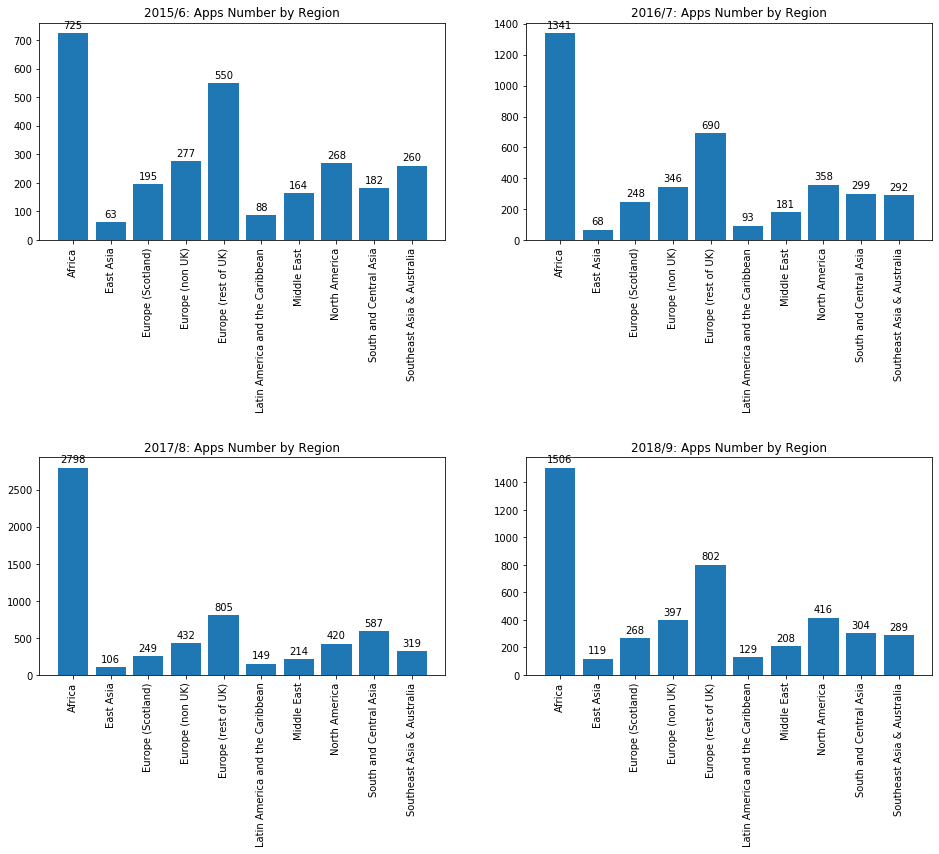

In [23]:
f, ax = plt.subplots(2, 2, figsize=(16, 12))
year_region_group = df.groupby(['Entry Year', 'Region'])

# Get all the regions
region_label = year_region_group.sum().index.levels[1].tolist()

def autolabelfor(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Make an empty dict to store the whole data.(four years)
total_data = {}
for i in range(0, len(year_labels)):
    years_data = []
    for j in range(0, len(region_label)):
        cur = (year_labels[i],region_label[j])
        years_data.append(year_region_group.get_group(cur).sum()['Apps'])
    total_data[year_labels[i]] = years_data

# Make a function to generate bar plot for each data
def generate_bar(data, ax):
    x_range = np.arange(len(region_label))
    rect = ax.bar(region_label, data)
    ax.set_xticks(x_range)
    ax.set_xticklabels(region_label, rotation=90)
    autolabelfor(rect, ax)

ax_arr = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
for i in range(0, len(total_data)):
    generate_bar(total_data[year_labels[i]], ax_arr[i])
    ax_arr[i].set_title('{}: Apps Number by Region'.format(year_labels[i]))

plt.subplots_adjust(hspace=1)
plt.show()

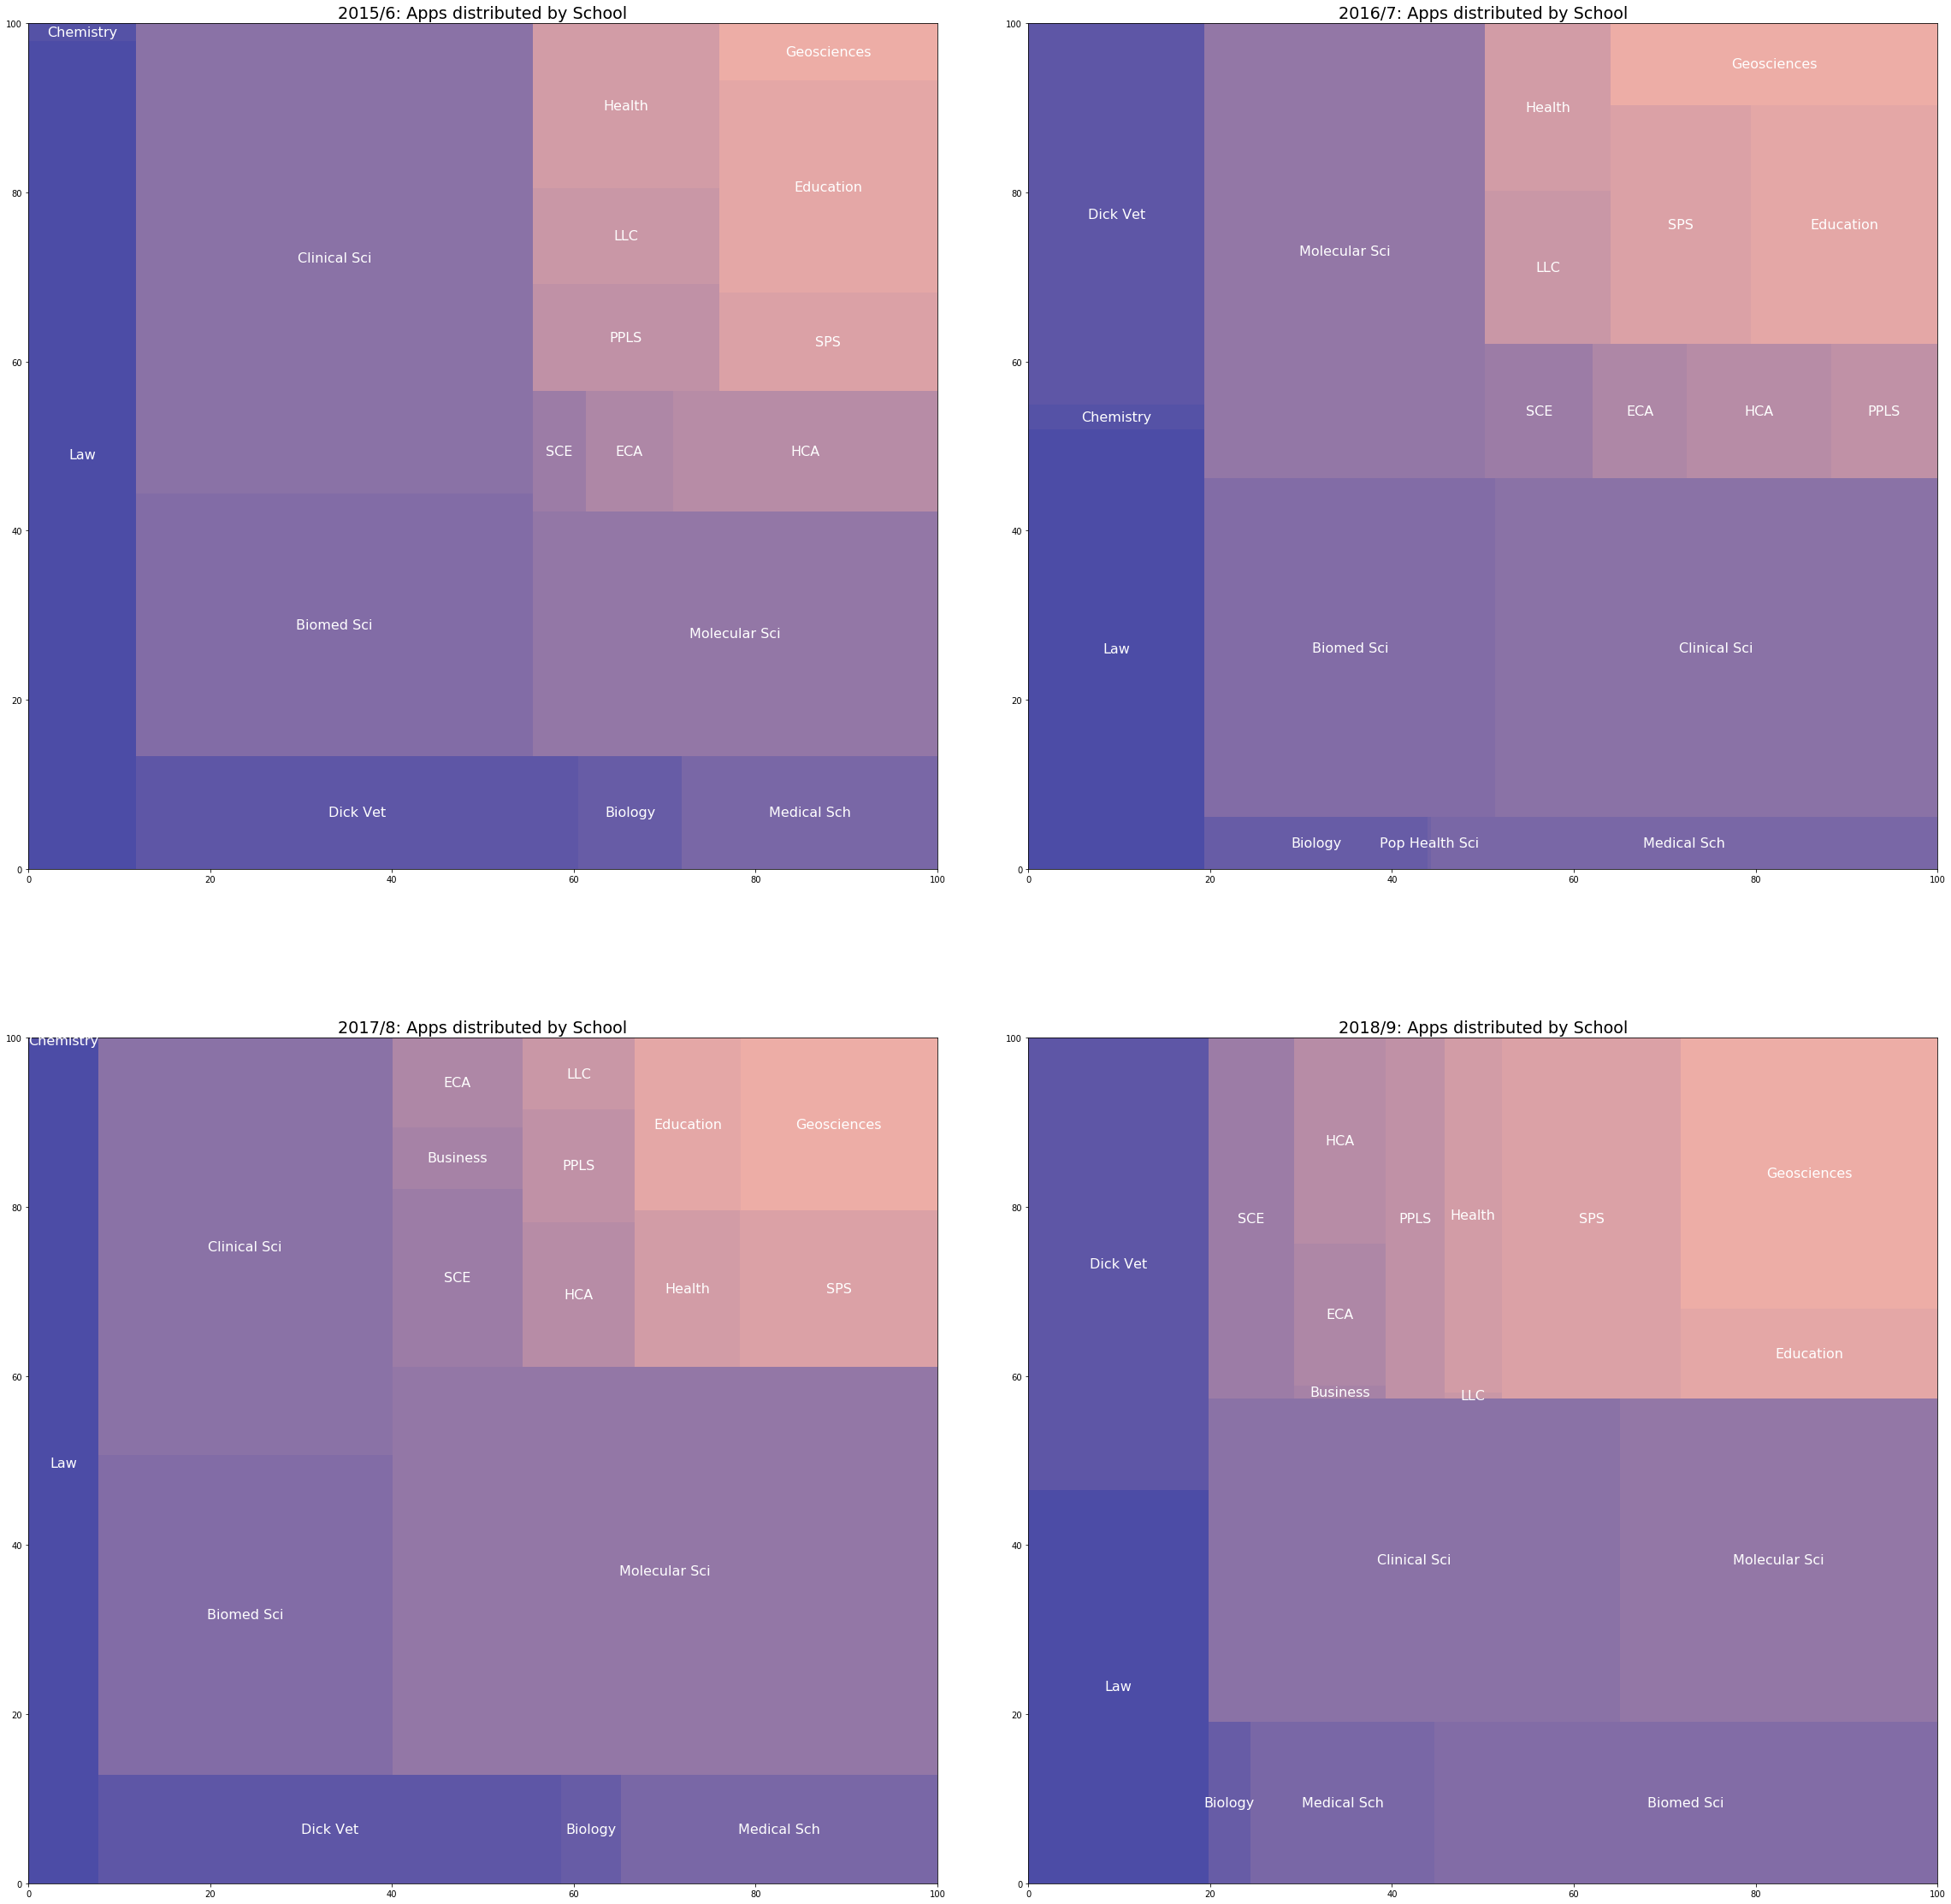

In [24]:
# Library for treemap
import squarify
f, ax = plt.subplots(2, 2, figsize=(40, 40))
apps_total_year_school = df.groupby(['Entry Year', 'School'])
int_func = np.vectorize(int)
schools = df['School'].unique()
# Make an empty list to store all school list
schools_list = []
apps_schools_list = []
for index in range(0, len(year_labels)):
    school_by_year = df[df['Entry Year'] == year_labels[index]]['School'].unique()
    schools_list.append(school_by_year)
    apps_schools_list.append([])
    for j in range(0, len(school_by_year)):
        cur = (year_labels[index], school_by_year[j])
        apps_schools_list[index].append(apps_total_year_school.get_group(cur).sum()['Apps'])


# The Number of the length of the color array
N = 20
HSV_tuples = [(x*1.0/N, x*0.6/N, 0.5) for x in range(N)]

# Maping the schools to a unified color
colors = dict(zip(schools, HSV_tuples))

# Make a function to generate treemap plot for each data
def generate_squar(index, ax):
    volume = int_func(apps_schools_list[index])
    labels = schools_list[index]
    color = []
    for con in labels:
        color.append(colors[con])
    plt.rc('font', size=16)
    plt.rc('text', color="#ffffff")
    squarify.plot(sizes=volume, label=labels, alpha=0.7, ax=ax, color=color)

ax_arr = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]

for index in range(0, len(year_labels)):
    generate_squar(index, ax_arr[index])
    ax_arr[index].set_title('{}: Apps distributed by School'.format(year_labels[index]))

plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.show()



# Reflect and Hypothesise:

## Reflect

1. For the dataset
The admission data is clean enough, and we just do some simple clean for the data, for the analysis part, I have to try to do 7 links between different columns. the admission data contains geographic data and the largest part the rest columns were category data. all data was divided into 4 entry years. since the dataset is just one excel file, so we don't have a foreign key to analyse.(However, if we divide it to sub table, we will get, but :)) Other thing, I found in the dataset is, for the gender part, we just remove the 'N' value, which means NOT GIVEN, it might be a moral problem that we ignore the minority, but for the ten thousand records for male and female, we prefer to get a better analyse with this two majority part.

2. For the technical part
For the bubble map, it shows a mapping from the country name in the data to the latitude and longitude value. I use an API request to get the information and back up the failed part. the failed part will be interpreted manually. In general, our data contains four year's data, define a generating function for each year's data is an elegant way to write the code.

## Hypothesise
According to the data, I can list some hypothesise as blow:
    1. Programme related to the STEM subject might have a higher growth rate of the number of applicants.
        why: the most obvious parts in subject treemap were all belonged to STEM.
        how to test:
            Calculate the annual enrollment rate of each Programme and subject area.
    2. Politics have a direct infect on the online education project.
        why: the line chart shows a decrement of the total amount of applicants in entry year 2018/9. 
            (application submitted in 2017)
        how to test:
            Calculate the annual enrollment growth rate.
    3. When the University gives an offer to an applicant, the possible application status move to 
       next admission step is around 80%.
        why: the rate for applicants moves to the next admission step is around 80% each year.
        how to test:
            Calculate the average rate for applicants moves to the next admission step from 2015 to 2018.
    4. Nigeria can be a specific country to analyse the reason why submit a large number of applications.
        why: the country of the largest amount of applications in Africa is Nigeria, and the most popular
        programme is public healthy
        how to test:
            plot the programme distribution of the applications from Nigeria.

## PLAN FOR GROUPWORK

After talking to the data host, I have come up some ideas for assignment 3:
    1. Build a website or more interactive project to show the data.
    2. Find things out of the Admission data, like region, economy, politics, region.
    3. Try to be creative, like physical visualization, data story, etc.